# __Why are the best employees leaving?__

## _Predicting who will leave the company by Machine Learning_

### Description on Kaggle

*This dataset is simulated

Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:
- Satisfaction Level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Departments (column sales)
- Salary
- Whether the employee has left

### Table of contents

- Introduction
- Exploring and preparing data for sklearn
- Trying classifiers
- Finding feature importances
- Summary

### __Introduction__

On this kernel, I predict which employees will leave the company using machine learning. First, I will briefly check the data and prepare them for the machine learning package scikit-learn http://scikit-learn.org/stable/. Then, I will try several algorithms (classifiers) and tune parameters to find out which algorithm can predict who will leave the company the most precisely. After finding the best algorithm, feature importances from the algorithm will be calculated to see which features make more contirbutions to my prediction.

For my exploratory data analysis (EDA) part by ggplot in R, check out the other jupyter notebook in the same respository.

In [1]:
# import packages to be used (more will be imported in later cells)
import pandas as pd
import numpy as np

In [4]:
#This is for the kernel on my local computer
df=pd.read_csv("HR_comma_sep.csv")

###  __Exploring and preparing data for sklearn__

In [5]:
df.head() #check the first few values of each variable

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.describe() #check statistics of numerical variables

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


There are 14999 employees each with 10 features.I found this dataset is already clean and there are no missing values or outliers in my EDA part. Thus, I will use all features and all employees. However, we need to make the categorical variables 'sales' and 'salary' into numerical ones for the machine learning package, sklearn. The transformation steps are as following.

- Rename 'sales' to 'department' which seems to be a more appropriate feature name
- Replace 'salary' values, 'low', 'medium', and 'high' with numerical values 1, 2, and 3, respectively 
- Change the newly named categorical variable 'department' (originally 'sales') into indicator (dummy) variables using get_dummies() from the package pandas (I do not use get_dummies() for 'salary' since the values are ordered)

Refereance:
- http://scikit-learn.org/stable/modules/preprocessing.html (See 4.3.4)
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

In [7]:
#  'sales' into 'department' 
df_dummies = df.rename(index=str, columns={'sales': 'department'})
df_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
#  'low', 'medium', and 'high' into numerical values 1, 2, and 3
df_dummies['salary'].replace(['low', 'medium', 'high'], [1,2,3], inplace=True)
df_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [9]:
# 'department' (originally 'sales') into indicator (dummy) variables 
df_dummies = pd.get_dummies(df_dummies, columns =['department'])
df_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [10]:
df_dummies.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__Making label (target) and feature values as lists__

In [11]:
# Make a target (label) list with 'left' column
label_dummies = df_dummies['left'].values.tolist()

In [12]:
# Remove 'left' from the dataframe to make a label list
feature_dummies = df_dummies.drop('left',1).values.tolist()

In [13]:
# Make a feature name list and check features
features_list = list(df_dummies.drop('left',1))
print(len(feature_dummies[0]))
print(features_list)

18
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary', 'department_IT', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical']


Now I have 18 features in total after adding indicator variables for department and removing 'left'

__Making a function that tests each classifier with cross validation__

In [14]:
# Define a fuction that test a classifier 'clf' with Stratified ShuffleSplit cross-validator

from sklearn.model_selection import StratifiedShuffleSplit

def test_classifier(clf, label, feature, print_output = True):
    sss = StratifiedShuffleSplit(n_splits=10, random_state = 42)
    # I reduced n_splits from 100 to 10 for speed (Kaggle kernel didn't allow 100)
    true_neg = 0
    false_neg = 0
    true_pos = 0
    false_pos = 0
    for train_index, test_index in sss.split(feature, label):
        feature_train = []
        feature_test  = []
        label_train = []
        label_test = []
        for i in train_index:
            feature_train.append(feature[i])
            label_train.append(label[i])
        for j in test_index:
            feature_test.append(feature[j])
            label_test.append(label[j])
        
        # fit the given classifier (clf) using train set and test it using test set
        clf.fit(feature_train, label_train)
        preds = clf.predict(feature_test)
        for pred, truth in zip(preds, label_test):
            if pred == 0 and truth == 0:
                true_neg += 1
            elif pred == 0 and truth == 1:
                false_neg += 1
            elif pred == 1 and truth == 0:
                false_pos += 1
            elif pred == 1 and truth == 1:
                true_pos += 1
            else:
                print("Warning: invalid predicted label (neither 0 nor 1)")
                print("Evaluating performance for processed predictions:")
                break
    try:
        total_preds = true_neg + false_neg + false_pos + true_pos
        accuracy = round(1.0*(true_pos + true_neg)/total_preds,4)
        precision = round(1.0*true_pos/(true_pos + false_pos),4)
        recall = round(1.0*true_pos/(true_pos + false_neg),4)
        f1 = round(2.0*true_pos/(2*true_pos + false_pos + false_neg),4)
        f2 = round((1 + 2.0*2.0)*precision*recall/(4*precision + recall),4)
        if print_output: # True by default  
            print(clf)
            print("accuarcy:", accuracy, "precision:", precision,"recall:", 
                  recall,"f1:", f1, "f2:", f2)
            #print("total predictions:", total_preds, "true_positives:", true_pos, 
            #    "false_positives:", false_pos, "false_negatives:", false_neg, "true_negatives:",true_neg)
            print("")
    except:
        print("Got a divide by zero when trying out:", clf)
        print("Precision or recall may be undefined due to a lack of true positive predicitons.")
    return [accuracy, precision, recall, f1, f2]

### __Trying classifiers__

Now I will try some basic machine learning algorithms and see which algorithm works the best.

__Naive Bayes (Gaussian NB)__

In [15]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
test_classifier(clf, label_dummies, feature_dummies)

GaussianNB(priors=None)
accuarcy: 0.7313 precision: 0.4611 recall: 0.7658 f1: 0.5756 f2: 0.6764



[0.7313, 0.4611, 0.7658, 0.5756, 0.6764]

Not a bad start! I will add the Pricipal component analysis (PCA) and tune the parameter n_components (number of components) to see if PCA helps.

Reference: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

__Naive Bayes (Gaussian NB) with PCA__

In [16]:
# GaussianNB with PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

NB_PCA_performance = [('Measures',['Accuracy','Precision','Recall','F1', 'F2'])]
for i in range(len(feature_dummies[0])):
    estimators = [('reduce_dim', PCA(n_components=i+1)), ('clf', GaussianNB())]
    clf = Pipeline(estimators)
    #print("n_components for PCA: ", i+1, "\n")
    n_compoenent = str(i+1)
    NB_PCA_performance.append((n_compoenent, 
                               test_classifier(clf, label_dummies, feature_dummies, print_output=False)))
df_output = pd.DataFrame.from_items(NB_PCA_performance)

In [17]:
header = df_output['Measures']
df_output.set_index('Measures',inplace=True)
df_output_transposed = df_output.transpose()
df_output_transposed 

Measures,Accuracy,Precision,Recall,F1,F2
1,0.7666,1.0000,0.0193,0.0379,0.0240
2,0.7845,0.9495,0.1000,0.1809,0.1218
3,0.7784,0.8075,0.0905,0.1627,0.1100
4,0.7793,0.6767,0.1389,0.2305,0.1652
5,0.7799,0.6846,0.1392,0.2314,0.1656
6,0.7801,0.6873,0.1398,0.2323,0.1663
7,0.7789,0.5431,0.4468,0.4902,0.4632
8,0.7793,0.5434,0.4563,0.4960,0.4714
9,0.7781,0.5381,0.4762,0.5053,0.4874
10,0.8251,0.6486,0.5784,0.6115,0.5912


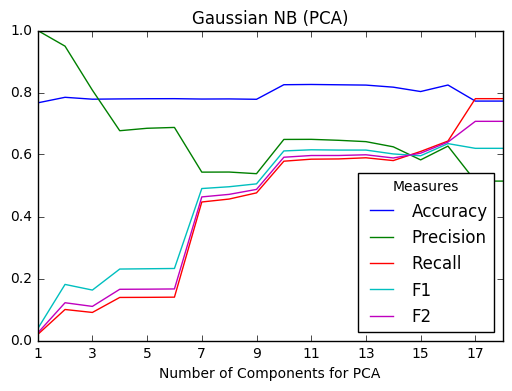

In [18]:
import matplotlib.pyplot as plt

df_output_transposed.plot()
plt.title('Gaussian NB (PCA)')
plt.xlabel('Number of Components for PCA')
plt.show()

The number of component with the best accuracy and overall good values for other measures is around 10, so I ran the algorithm again with n_component =10 below.

In [19]:
# GaussianNB with PCA (n_components=10)
estimators = [('reduce_dim', PCA(n_components=10)), ('clf', GaussianNB())]
clf = Pipeline(estimators)
test_classifier(clf, label_dummies, feature_dummies)

Pipeline(steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', GaussianNB(priors=None))])
accuarcy: 0.8251 precision: 0.6486 recall: 0.5784 f1: 0.6115 f2: 0.5912



[0.8251, 0.6486, 0.5784, 0.6115, 0.5912]

Gaussian NB performs better with PCA and with an ideal number of components for PCA the performance value for each measure is as following: 

- accuarcy: 0.83 
- precision: 0.65 
- recall: 0.58 
- f1: 0.61 
- f2: 0.59

Note that the performance values vary each run, but the values are the same up to the second decimal place approximately.


__Decision Tree__

In [20]:
# Decision tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
test_classifier(clf, label_dummies, feature_dummies)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
accuarcy: 0.9806 precision: 0.9471 recall: 0.9728 f1: 0.9598 f2: 0.9675



[0.9806, 0.9471, 0.9728, 0.9598, 0.9675]

The performance values for a decision tree are so high! The performance value for each measure is as following: 

- accuarcy: 0.98
- precision: 0.95 
- recall: 0.97 
- f1: 0.96 
- f2: 0.97

Note that the parameter min_samples_split here is 2 by default. 

Now I will add PCA and tune n_components. Moreover, the parameter min_samples_split for a decision tree will be tuned.

__Decision Tree with PCA__

In [21]:
# Decision tree with PCA (varied number of components)

DT_PCA_performance = [('Measures',['Accuracy','Precision','Recall','F1', 'F2'])]
for i in range(len(feature_dummies[0])): # loop for trying different numbers of components
    estimators = [('reduce_dim', PCA(n_components=i+1)), ('clf', tree.DecisionTreeClassifier())]
    clf = Pipeline(estimators)
    #print("n_components for PCA: ", i+1, "\n")
    n_compoenent = str(i+1)
    DT_PCA_performance.append((n_compoenent, 
                               test_classifier(clf, label_dummies, feature_dummies, print_output = False)))
df_output = pd.DataFrame.from_items(DT_PCA_performance)

In [22]:
header = df_output['Measures']
df_output.set_index('Measures',inplace=True)
df_output_transposed = df_output.transpose()
df_output_transposed 

Measures,Accuracy,Precision,Recall,F1,F2
1,0.9631,0.9032,0.9462,0.9242,0.9373
2,0.9615,0.8989,0.9443,0.9210,0.9349
3,0.9651,0.9068,0.9510,0.9284,0.9418
4,0.9643,0.9050,0.9496,0.9267,0.9403
5,0.9653,0.9119,0.9454,0.9283,0.9385
6,0.9675,0.9138,0.9535,0.9332,0.9453
7,0.9677,0.9119,0.9569,0.9338,0.9475
8,0.9690,0.9148,0.9591,0.9364,0.9499
9,0.9680,0.9122,0.9577,0.9344,0.9482
10,0.9739,0.9306,0.9619,0.9460,0.9555


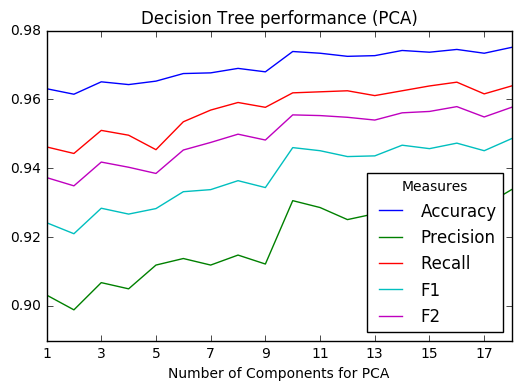

In [23]:
df_output_transposed.plot()
plt.title('Decision Tree performance (PCA)')
plt.xlabel('Number of Components for PCA')
plt.show()

The performances tend to increase as the number of components for PCA increases, but the values are not better than a decision tree without PCA. 

Thus, I will remove PCA again and try different values for the minimum number of samples required to split for a decision tree.

__Tuning min_samples_split for Decision Tree__

In [24]:
# Decision tree with varied min_samples_split

DT_minSamples_performance = [('Measures',['Accuracy','Precision','Recall','F1', 'F2'])]
for i in range(2,22,2): # loop for trying different numbers of components
    clf = tree.DecisionTreeClassifier(min_samples_split=i)
    #print("min_samples_split: ", i, "\n")
    min_samples_split = str(i)
    DT_minSamples_performance.append((min_samples_split, 
                                      test_classifier(clf, label_dummies, feature_dummies,print_output = False)))
df_output = pd.DataFrame.from_items(DT_minSamples_performance)

header = df_output['Measures']
df_output.set_index('Measures',inplace=True)
df_output_transposed = df_output.transpose()
df_output_transposed 

Measures,Accuracy,Precision,Recall,F1,F2
2,0.9815,0.9497,0.9737,0.9615,0.9688
4,0.9808,0.9556,0.9641,0.9598,0.9624
6,0.9784,0.9518,0.9577,0.9548,0.9565
8,0.9771,0.9554,0.9482,0.9518,0.9496
10,0.9761,0.9544,0.9448,0.9496,0.9467
12,0.9767,0.9595,0.9420,0.9507,0.9454
14,0.9768,0.9603,0.9415,0.9508,0.9452
16,0.9771,0.9630,0.9401,0.9514,0.9446
18,0.9767,0.9650,0.9359,0.9502,0.9416
20,0.9773,0.9700,0.9336,0.9515,0.9407


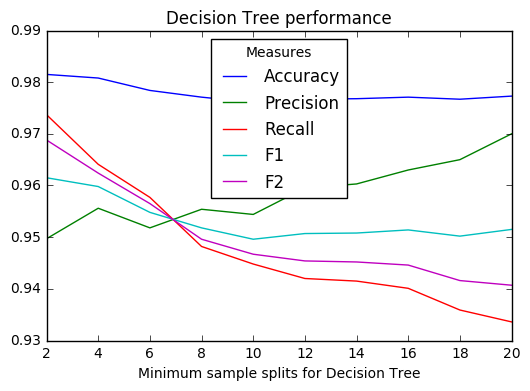

In [25]:
df_output_transposed.plot()
plt.title('Decision Tree performance')
plt.xlabel('Minimum sample splits for Decision Tree')
plt.show()

As the minimum sample size for splitting increases, all measures tend to decrease except for precision. Thus, the decision tree with the default min_samples_split =2 that I tried the first is the best.

### __Finding Feature Importances__

I have found that a decision tree with default parameter values works the best among what I tried. Now I will find the feature importances to see what factors contributed more when predicting who will leave the company using the decision tree.  

In [26]:
# feature importance using decision tree

clf = tree.DecisionTreeClassifier()
test_classifier(clf, label_dummies, feature_dummies)
feature_importance =  clf.feature_importances_ 
#note: Here I'm just using the last fold 'clf' from test_classifier.
# Getting feature imporances for each fold to average could be better, but skipped.

important_features = [[features_list[index], num] for index, num in enumerate(feature_importance)]
#print("All features and their importance: \n", important_features, " \n")

# sorted by importance
from operator import itemgetter

important_features_sorted = sorted(important_features, key=itemgetter(1))
important_features_sorted = important_features_sorted[::-1]

print("All features and their importance (sorted by importance):")
for feature, importance in important_features_sorted:
    print(feature, round(importance,4))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
accuarcy: 0.9815 precision: 0.9507 recall: 0.9728 f1: 0.9617 f2: 0.9683

All features and their importance (sorted by importance):
satisfaction_level 0.4977
last_evaluation 0.1442
time_spend_company 0.1386
number_project 0.1088
average_montly_hours 0.0919
department_technical 0.0042
salary 0.004
department_sales 0.0023
Work_accident 0.0021
department_support 0.0018
department_IT 0.0009
department_hr 0.0008
department_RandD 0.0008
department_accounting 0.0007
department_product_mng 0.0005
department_marketing 0.0004
department_management 0.0001
promotion_last_5years 0.0


The feature importances vary each run, but they stay the same up to the second or third decial points. The top 5 features are always the top 5 and the order of other features can vary each run due to their small importances. 

The top 5 features are satisfaction_level (0.497), last_evaluation (0.142), time_spend_company (0.137), number_project (0.110), and average_montly_hours (0.093).

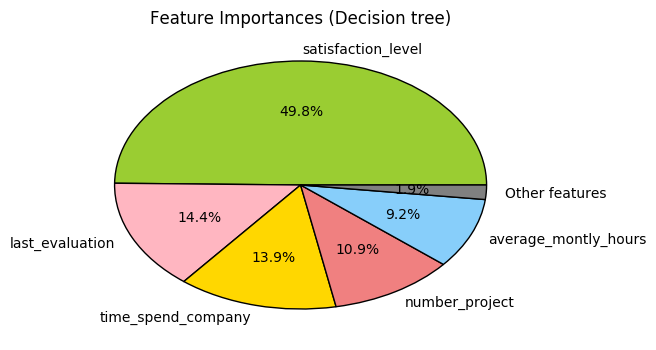

In [27]:
# Make a pie chart for feature importances 
important_feature_list = list(list(zip(*important_features_sorted))[0][:5])
pie_label = important_feature_list.append('Other features')
important_feature_immportances = list(list(zip(*important_features_sorted))[1][:5])
pie_values = important_feature_immportances.append(sum(list(zip(*important_features_sorted))[1][5:]))
colors = ['yellowgreen','lightpink','gold',  'lightcoral', 'lightskyblue', 'gray']
plt.pie(important_feature_immportances,labels =important_feature_list, autopct='%1.1f%%',
       colors = colors)
plt.title('Feature Importances (Decision tree)')
plt.show()

### __Summary__

To summarize, I found a decision tree without PCA and default parameters (e.g., min_samples_split = 2) works the best when predicting who left the company. The performance is as following:

- accuarcy: 0.98
- precision: 0.95 
- recall: 0.97 
- f1: 0.96 
- f2: 0.97

Using the feature importances, I found the most important features and their contributions to the prediction are 

- satisfaction level (49.7%)
- last evaluation (14.2%)
- years spent in the company  (13.8%)
- number of projects (11.0%)
- montly hours at workplace (9.3%)

This finding is pretty consistent to what I found in my exploratory data analysis (see the other jupyter notebook in the same repository to check out the EDA part).